In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


data = pd.read_csv('../dataset/merged_dataset.csv')

# separate features and labels
features = data.iloc[:, 1:].values  # shape: (42000, 784)
labels = data.iloc[:, 0].values     # shape: (42000,)

# split into train (70%), temp (30%) --> test and validation
train_features, temp_features, train_labels, temp_labels = train_test_split(
    features, labels, test_size=0.3, random_state=42
)

val_features, test_features, val_labels, test_labels = train_test_split(
    temp_features, temp_labels, test_size=2/3, random_state=42
)

# normalize pixel values to [0, 1]
train_features = train_features / 255.0
val_features = val_features / 255.0
test_features = test_features / 255.0

# one-hot encode labels
num_classes = 10
train_labels_onehot = np.eye(num_classes)[train_labels]
val_labels_onehot = np.eye(num_classes)[val_labels]
test_labels_onehot = np.eye(num_classes)[test_labels]

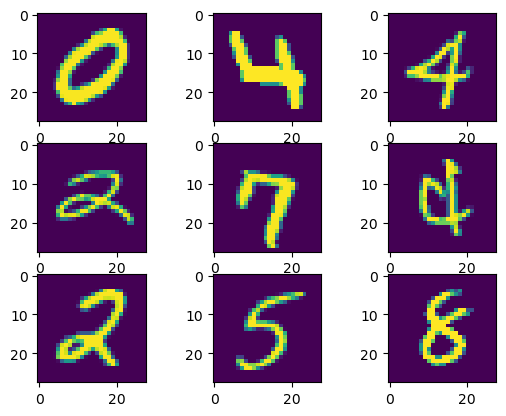

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         # Reshape the image data to 28x28 before displaying
         axs[i, j].imshow(train_features[cnt].reshape(28, 28))
         cnt += 1